In [52]:
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1
import os
import sys
# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
from dotenv import load_dotenv
%aimport settings
import settings
import pandas as pd
import numpy as np


maxsize=3000
np.set_printoptions(threshold=sys.maxsize)
pd.options.display.max_columns = 999
pd.options.display.max_rows = 352905

In [3]:
# import sys
# !{sys.executable} -m pip install pandas-profiling #to install pandas profiling

  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)
     |████████████████████████████████| 7.2 MB 4.9 MB/s eta 0:00:01
  Using cached tangled_up_in_unicode-0.1.0-py3-none-any.whl (3.1 MB)
  Using cached multimethod-1.6-py3-none-any.whl (9.4 kB)
     |████████████████████████████████| 653 kB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.4 MB/s eta 0:00:01
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
     |████████████████████████████████| 2.6 MB 8.6 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 1.9 MB/s eta 0:00:01
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
     |████████████████████████████████| 32.6 MB 1.8 MB/s eta 0:00:01     |████████████████████▎           | 20.7 MB 2.4 MB/s eta 0:00:05
  Using cached missingno-0.5.0-py3-none-any.whl (8.8 kB)
  Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Using cached PyYAML-5.4.1-cp38-cp38-macosx_10_9_x86_64.whl (253 kB)
  Using cached networkx-2.6.3-py3-none-any.whl (1

In [66]:
from pandas_profiling import ProfileReport # For profiling data
import ipywidgets as widgets 

In [63]:
data = pd.read_csv(settings.processed_data + "/season_plays_20192020.csv").drop('Unnamed: 0', axis=1)

In [65]:
data.head()

,event_idx,event_type_id,period_idx,period_type,game_time,shot_type,team_initiative_id,team_initiative_name,x_coord,y_coord,shooter_id,shooter_name,goalie_id,goalie_name,strength,empty_net_bool,gamePk,game_season,game_type,game_start_time
0,10,SHOT,1,REGULAR,2019-09-15T20:39:17Z,Wrist Shot,VGK,Vegas Golden Knights,-34.0,19.0,8475191,Reilly Smith,8478499.0,Adin Hill,NaN,NaN,2019010001,20192020,PR,2019-09-15T20:30:00Z
1,56,SHOT,1,REGULAR,2019-09-15T20:40:08Z,Snap Shot,ARI,Arizona Coyotes,67.0,-15.0,8476418,Robbie Russo,8476876.0,Malcolm Subban,NaN,NaN,2019010001,20192020,PR,2019-09-15T20:30:00Z
2,58,SHOT,1,REGULAR,2019-09-15T20:41:08Z,Snap Shot,VGK,Vegas Golden Knights,-36.0,32.0,8480727,Zach Whitecloud,8478499.0,Adin Hill,NaN,NaN,2019010001,20192020,PR,2019-09-15T20:30:00Z
3,61,GOAL,1,REGULAR,2019-09-15T20:43:59Z,Snap Shot,ARI,Arizona Coyotes,42.0,-19.0,8480950,Ilya Lyubushkin,8476876.0,Malcolm Subban,EVEN,False,2019010001,20192020,PR,2019-09-15T20:30:00Z
4,63,GOAL,1,REGULAR,2019-09-15T20:46:11Z,Wrist Shot,VGK,Vegas Golden Knights,-71.0,-3.0,8474157,Max Pacioretty,8478499.0,Adin Hill,EVEN,False,2019010001,20192020,PR,2019-09-15T20:30:00Z


#### Goalies data

In [68]:
data_2 = pd.read_excel('/Users/henaghonia/Desktop/udem/Sem 1/Data science/Hockey-all-star-analytics/data/raw/summary_2018_19.xlsx')

In [70]:
data_2.head()

,Player,Season,Team,S/C,GP,GS,W,L,T,OT,SA,Svs,GA,Sv%,GAA,TOI,SO,G,A,P,PIM
0,Andrei Vasilevskiy,20182019,TBL,L,53,53,39,10,--,4,"1,713","1,585",128,0.925,2.40,3203:45,6,0,3,3,6
1,Sergei Bobrovsky,20182019,CBJ,L,62,61,37,24,--,1,"1,756","1,603",153,0.913,2.58,3556:40,9,0,0,0,2
2,Frederik Andersen,20182019,TOR,L,60,60,36,16,--,7,"1,958","1,796",162,0.917,2.77,3510:15,1,0,1,1,2
3,Martin Jones,20182019,SJS,L,62,62,36,19,--,5,"1,699","1,523",176,0.896,2.94,3597:13,3,0,1,1,2
4,Carey Price,20182019,MTL,L,66,64,35,24,--,6,"1,952","1,791",161,0.918,2.49,3880:15,4,0,1,1,2


(0.9, 1.0)

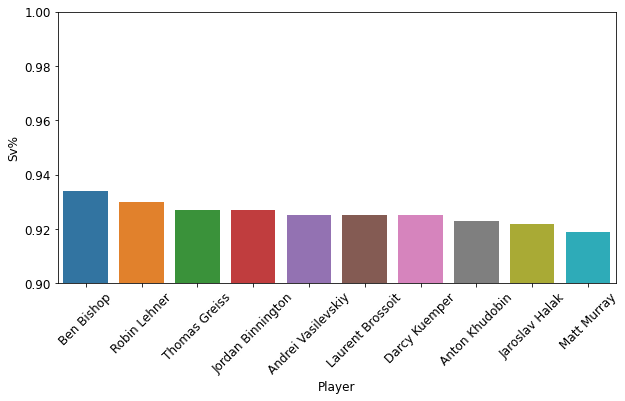

In [80]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.size"] = 12
# changes y axis 
sns.barplot(x="Player", y="Sv%", data=data_2.sort_values('Sv%', ascending = False, axis=0).head(10))#2019-2020
plt.xticks(rotation=45)
plt.ylim(0.9, 1)


In [ ]:
##Task : Subplot 2016 2017 2018, 2019 ,2020


##Data dictionary
# S/c : Shoots/catches indicates which side a skater shoots from or which 
#       side a goalie's catching glove is on. 
#       In both cases, there are more skaters that shoot from the left and goalies that catch on the left. 
#       S/C is not an indication of conventional left or right handedness

# Games played, GP
# Games played are games where the player had at least one shift on the ice (or participated in the shootout). Players included on the active roster but scratched from the game day lineup do not register a game played. Backup goalies (or rarely, skaters) in the lineup who do not receive playing time do not register a game played. However, goalie (or skater) who appears only in the shootout also earns a game played despite zero minutes of ice time.

# Games started, GS
# Goalie's games played where he started the game for the team. If a goalie started the game, was relieved, and returned later in the game, that counts as one game started and zero games relieved.

#SA : Shots against are the number of shots on goal against a goalie or a team.

# Svs : Saves by a goalie or a team
## GA : Goals against can refer to the total goals allowed by a team or by a goaltender
## Goals-against average, GAA
#Goals-against average is the average number of goals that a goaltender gives up per game, measured in 60-minute increments, calculated GAA = GA*60/time on ice. See even-strength save percentage; see save percentage.
#TOI: Player's time on ice
#SO : Shutouts

#A : Assists
#P: points
#PM: Penalty minutes

#Best performing teams according to Sv%, 
#top 20 goalies according to SV%
#List 20 players which has most wins and most losses
#List top 20 players which had highest SA
#List 20 players which took more time on ice(TOI) and had S/c
#Plot number of saves(Svs) vs players/teams and which team had more number of wins


In [4]:
profile = ProfileReport(data, title="Pandas Profiling Report")
profile.to_file("/Users/henaghonia/Desktop/udem/Sem 1/Data science/Hockey-all-star-analytics/reports/profile_2019_2020.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

convert json to pandas

In [ ]:
## To have interactive plot using ipwidgets

In [9]:
import requests
request=requests.get('https://statsapi.web.nhl.com/api/v1/playTypes')
elevations=request.text
data = json.loads(elevations)
df = pd.json_normalize(data, record_path=['playerTypes'], meta = ['name', 'id', 'cmsKey', 'code'])

In [12]:
data

[{'name': 'Unknown',
  'id': 'UNKNOWN',
  'cmsKey': 'gamecenterUnknown',
  'playerTypes': None,
  'code': 'Unknown',
  'secondaryEventCodes': []},
 {'name': 'Faceoff',
  'id': 'FACEOFF',
  'cmsKey': 'gamecenterFaceoff',
  'playerTypes': [{'playerType': 'Winner'}, {'playerType': 'Loser'}],
  'code': 'Faceoff',
  'secondaryEventCodes': []},
 {'name': 'Hit',
  'id': 'HIT',
  'cmsKey': 'gamecenterHit',
  'playerTypes': [{'playerType': 'Hitter'}, {'playerType': 'Hittee'}],
  'code': 'Hit',
  'secondaryEventCodes': []},
 {'name': 'Giveaway',
  'id': 'GIVEAWAY',
  'cmsKey': 'gamecenterGiveaway',
  'playerTypes': [{'playerType': 'PlayerID'}],
  'code': 'Giveaway',
  'secondaryEventCodes': []},
 {'name': 'Goal',
  'id': 'GOAL',
  'cmsKey': 'gamecenterGoal',
  'playerTypes': [{'playerType': 'Scorer'}, {'playerType': 'Assist'}],
  'code': 'Goal',
  'secondaryEventCodes': ['shot_type', 'soResult']},
 {'name': 'Shot',
  'id': 'SHOT',
  'cmsKey': 'gamecenterShot',
  'playerTypes': [{'playerType': 'S